# Data Exploration

In [24]:
%matplotlib inline

In [25]:
import numpy as np
from scipy import sparse
import matplotlib.pyplot as plt
import pygsp
from pygsp import graphs, filters
import networkx as nx
import pickle
import collections
from numpy import linalg

In [26]:
#import the three directed graphs: 
G_StanLee = nx.read_gpickle('../data/G_StanLee.gpickle')
G_StephenHawking = nx.read_gpickle('../data/G_StephenHawking.gpickle')
G_AlanRickman = nx.read_gpickle('../data/G_AlanRickman.gpickle')


In [27]:
#make undirected versions
G_StanLee_undir=G_StanLee.to_undirected()
G_StephenHawking_undir=G_StephenHawking.to_undirected()
G_AlanRickman_undir=G_AlanRickman.to_undirected()

In [28]:
#Adjacency matrices of undirected graphs
A_StanLee = nx.adjacency_matrix(G_StanLee_undir).todense()
A_StephenHawking = nx.adjacency_matrix(G_StephenHawking_undir).todense()
A_AlanRickman = nx.adjacency_matrix(G_AlanRickman_undir).todense()

In [29]:
Names= ['StanLee','StephenHawking','AlanRickman']
Graphs=[G_StanLee, G_StephenHawking, G_AlanRickman]
Graphs_undir =[G_StanLee_undir, G_StephenHawking_undir, G_AlanRickman_undir]

# Basic properties of the graphs


We study basic properties of the graphs such as number of nodes, number of edges, strongly connectedness, the diameter, the average clustering coefficient and number of triangles or global clustering coefficient 


In [30]:
#Number of nodes and edges for each graphs 
for G, name in zip (Graphs, Names) :
    print ('The graph G_{} has {} nodes and {} edges '. format( name, len(G.nodes),len(G.edges)))

The graph G_StanLee has 2701 nodes and 33469 edges 
The graph G_StephenHawking has 2701 nodes and 26921 edges 
The graph G_AlanRickman has 2701 nodes and 28012 edges 


In [31]:
# Check if the graphs are strongly connected (if not, diameter=infinity)
for G, name in zip (Graphs, Names) :
    if nx.is_strongly_connected(G):
        print('The graph G_{} is strongly connected and its diameter is {}'.format( name, nx.diameter(G)))
    else: 
        print('The graph G_{} is not strongly connected'.format(name))
  

The graph G_StanLee is not strongly connected
The graph G_StephenHawking is not strongly connected
The graph G_AlanRickman is not strongly connected


# !!!Note:  Extract the strongly connected components and diameter of the largest strongly connected component

In [33]:
#return a list of nodes for the stronlgy connected components of a directed graph, how does this work??
i=1
for G, n in zip(Graphs, Names):
    strongcc=nx.strongly_connected_components(G)

In [12]:
strongcc

<generator object strongly_connected_components at 0x1a211f4990>

In [34]:
#compute the diameter of undirected graphs:
for G, name in zip(Graphs_undir, Names) : 
    print('The diameter of the undirected graph G_{} is {}'.format(name, nx.diameter(G)))

The diameter of the undirected graph G_StanLee is 7
The diameter of the undirected graph G_StephenHawking is 7
The diameter of the undirected graph G_AlanRickman is 8


# Clustering coefficients and number of 

In [37]:
#compute average clustering coefficient: 
#Note: Do we do for the directed or undirected graphs???
for G, name in zip(Graphs,Names):
    print('The graph G_{} has average clustering coefficient {}'.format(name,nx.average_clustering(G)))


The graph G_StanLee has average clustering coefficient 0.13116636151327363
The graph G_StephenHawking has average clustering coefficient 0.13762486811289285
The graph G_AlanRickman has average clustering coefficient 0.12266346600193209


In [38]:
#compute the number of triangles in each graph
T_StanLee=sum(nx.triangles(G_StanLee_undir).values())/3
T_StephenHawking=sum(nx.triangles(G_StephenHawking_undir).values())/3
T_AlanRickman=sum(nx.triangles(G_AlanRickman_undir).values())/3

In [39]:
#compute number of three paths in the graphs
np.sum(np.linalg.matrix_power(A_StanLee,3))
np.sum(np.linalg.matrix_power(A_StephenHawking,3))
np.sum(np.linalg.matrix_power(A_AlanRickman,3))

151801048

In [40]:
#compute global clustering coefficient of the graphs
C_StanLee=T_StanLee/np.sum(np.linalg.matrix_power(A_StanLee,3))
C_StephenHawking=T_StephenHawking/np.sum(np.linalg.matrix_power(A_StephenHawking,3))
C_AlanRickman=T_AlanRickman/np.sum(np.linalg.matrix_power(A_AlanRickman,3))

In [41]:
print('The graph G_StanLee has {} triangles and global clustering coefficient {}'. format(int(T_StanLee), C_StanLee))
print('The graph G_StephenHawking has {} triangles and global clustering coefficient {}'. format(int(T_StephenHawking), C_StephenHawking))
print('The graph G_AlanRickman has {} triangles and global clustering coefficient {}'. format(int(T_AlanRickman), C_AlanRickman))



The graph G_StanLee has 60096 triangles and global clustering coefficient 0.0003792721652539111
The graph G_StephenHawking has 41973 triangles and global clustering coefficient 0.0003354996251497291
The graph G_AlanRickman has 38076 triangles and global clustering coefficient 0.0002508283078519985


# Degree Distribution


## question: these are histograms: make them into distributions?

In [44]:
#plot the degree histograms  
def plot_degree(G, name):
    degree_sequence = sorted([d for n, d in G.in_degree()], reverse=True)  # degree sequence
# print "Degree sequence", degree_sequence
    degreeCount = collections.Counter(degree_sequence)
    deg, cnt = zip(*degreeCount.items())

    fig, ax = plt.subplots()
    plt.bar(deg, cnt)
    #width=0.80

    plt.title("Total Degree Histogram for G_"+name)
    plt.ylabel("Count")
    plt.xlabel("Degree")
    #ax.set_xticks([d + 0.4 for d in deg])
    #ax.set_xticklabels(deg)

    plt.show()

In [45]:
 #plot the in-degree histograms of a directed graph 
def plot_in_degree(G, name):
    degree_sequence = sorted([d for n, d in G.in_degree()], reverse=True)  # degree sequence
# print "Degree sequence", degree_sequence
    degreeCount = collections.Counter(degree_sequence)
    deg, cnt = zip(*degreeCount.items())

    fig, ax = plt.subplots()
    plt.bar(deg, cnt)
    #width=0.80

    plt.title("In-Degree Histogram for G_"+name)
    plt.ylabel("Count")
    plt.xlabel("Degree")
    #ax.set_xticks([d + 0.4 for d in deg])
    #ax.set_xticklabels(deg)

    plt.show()

In [46]:
#plot the out-degree histograms of a directed graph 
def plot_out_degree(G, name):
    degree_sequence = sorted([d for n, d in G.out_degree()], reverse=True)  # degree sequence
# print "Degree sequence", degree_sequence
    degreeCount = collections.Counter(degree_sequence)
    deg, cnt = zip(*degreeCount.items())

    fig, ax = plt.subplots()
    plt.bar(deg, cnt)
    #width=0.80

    plt.title("Out-Degree Histogram for G_"+name)
    plt.ylabel("Count")
    plt.xlabel("Degree")
    #ax.set_xticks([d + 0.4 for d in deg])
    #ax.set_xticklabels(deg)

    plt.show()

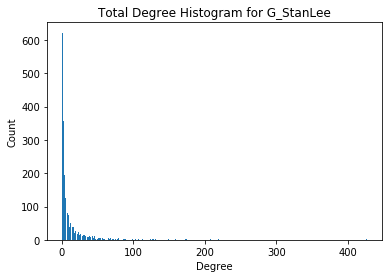

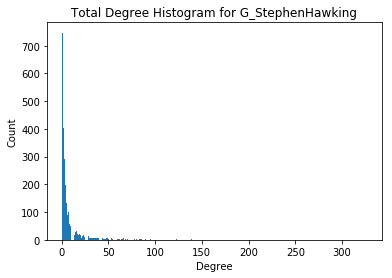

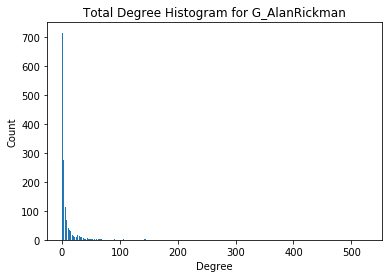

In [51]:
#Plot the degree histograms for the graphs
for G, name in zip(Graphs,Names): 
    plot_degree(G,name)


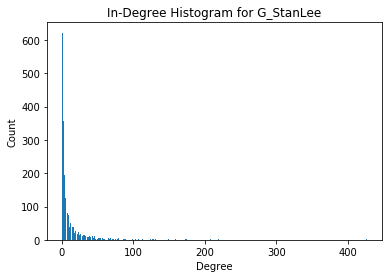

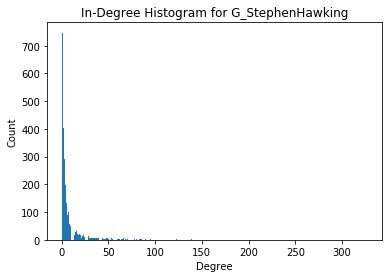

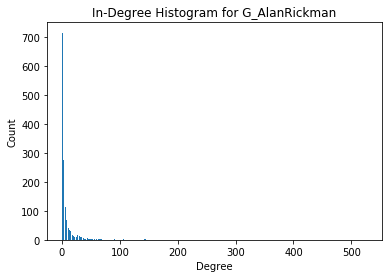

In [52]:
#plot in-degrees fot the graphs
for G,name in zip(Graphs,Names): 
    plot_in_degree(G,name)

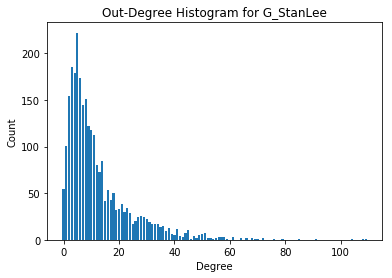

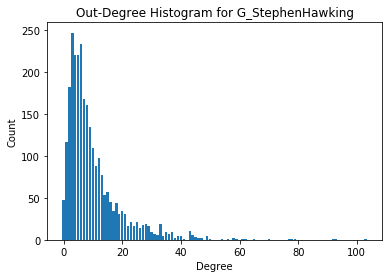

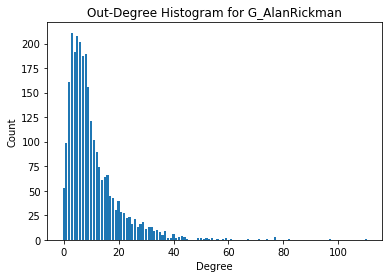

In [53]:
#Plot the out-degree histograms of the graphs
for G, name in zip(Graphs,Names): 
    plot_out_degree(G,name)
 

In [25]:
def plot_distribution(degree):
    '''
    degree list: the list of node degrees
    network_type: string used for plotting the title
    '''
    fig = plt.figure()
    ax = plt.gca()
    bins = min(int(np.max(degree) - np.min(degree)), 100)
    a = plt.hist(degree, bins=bins, density=True)
    #log = True
    plt.xlabel('Degree')
    plt.ylabel('Probability of node having degree k')
    plt.title('Degree distribution for ')